## Customer Analysis Data

In [141]:
import pandas as pd # import Pandas and numpy for data analysis
import numpy as np
import matplotlib.pyplot as plt #import matplotlib and seaborn for visualizations
import seaborn as sns
import statsmodels.api as sm #import stats for regression 

I analyzed the dataset of a business' ideal customers, their purchase history and personal characteristics. 
This analysis is aimed to assist partnership and marketing departments in better understanding their customers, aid in creating customer segments for better targeting, and partner with outside organizations with informed promotional alignment.
At first, the data question I asked was what method of purchase (web, catalog or store) most aligned with discount purchases, and from those discount purchases, what type of products were most popular. This data could then inform the best partnerships and promotional plans.

Dataset source: https://www.kaggle.com/imakash3011/customer-personality-analysis


In [142]:
df = pd.read_csv('marketing_campaign.csv', sep='\t') #read the csv, there are comma seperators

### Data overview and exploration

Below is the overview and exploratory data analysis, accompanied by commented code. 

A summary of the most important observations and discoveries that formed my understanding and formation of data questioning:

The data set contains 29 columns and 2240 rows. The one column missing data is the income column, with 24 null values. 

The ID column consists of entirely unique values, and therefore no aggregation of customer records is needed. 

Examining the Income column showed that beyond the null values, the income was also uneven among the 2240 customers. Though this may not be ideal in terms of distribution it appears to be a fair depiction of real world income.

The data is diverse for the most part within the numeric columns, however, the revenue and cost per contact are flat across all customers and lends little to this analysis. More on another form of measurement is provided in the data cleaning section. 

The data seems evenly distributed in terms of recency, shown through visualization and the maximum number of days since a customer’s last purchase being 99 and the minimum 0.

The Education column reveals interesting details, it includes five categories, one of which is 2n Cycle, a qualification awarded in Italy. Though it has little effect on the analysis, it is interesting!

The Marital status categories for the most part are expected, there are outliers Absurd, Alone, and YOLO. 

Other columns that will be further analyzed and aggregated in additional sections provide information about the type of products customers purchaser and the number of web visits per month.


In [143]:
pd.set_option('display.max_columns', 50) #show all columns
df.head() # A first look at the first 5 rows of the data set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [144]:
print(len(df)) #total length of the data set

2240


In [145]:
df.isna().any() # Looking for any null values throughout the data set, this will also return all column names 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [146]:
pd.Series(df['ID']).is_unique #Checking that each customer record and row is unique

True

In [147]:
df.groupby(['Income']).size() #look at the size of the Income column

Income
1730.0      1
2447.0      1
3502.0      1
4023.0      1
4428.0      1
           ..
157243.0    1
157733.0    1
160803.0    1
162397.0    1
666666.0    1
Length: 1974, dtype: int64

In [148]:
null_counts = df.isnull().sum() #sum the number of nulls within the full data set
null_counts[null_counts > 0].sort_values(ascending=False) #return column nulls that have a count greater than 0

Income    24
dtype: int64

In [149]:
#The Mean, Median, Max and Min of the income column 
print(df['Income'].mean())
print(df['Income'].median())
print(df['Income'].max())
print(df['Income'].min())

52247.25135379061
51381.5
666666.0
1730.0


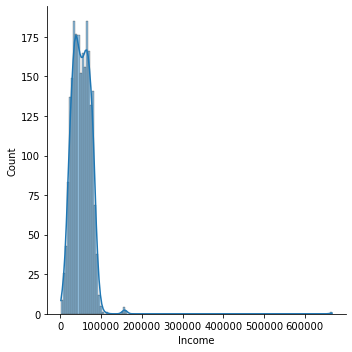

In [150]:
sns.displot(data=df, x="Income", kde = True) #distribution plot to look at the Income

In [151]:
df.groupby(['Z_Revenue']).size()
df.groupby(['Z_CostContact']).size()
#Looking at the revenue and Cost per contact reveals that the values are uniform across all customers

Z_CostContact
3    2240
dtype: int64

<AxesSubplot:xlabel='Recency'>

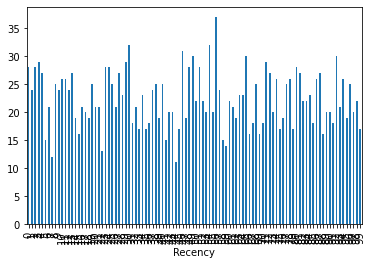

In [152]:
df.groupby('Recency').size().plot(kind='bar') #groupby and visualize the recency of purchases

In [163]:
print(df['Dt_Customer'].max()) #print the most recent date the customer enrolled with the company 
print(df['Dt_Customer'].min()) #print the latest date the customer enrolled with the company

2014-12-06 00:00:00
2012-01-08 00:00:00


In [175]:
print(df['Recency'].min()) 
print(df['Recency'].max()) 
#print the most recent day of purchase

0
99


In [176]:
df.groupby('Education').size() #groupby unique values in education and their size

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

In [178]:
df.groupby('Marital_Status').size() #groupby unique values in Marital Staus and their size

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

### Data cleaning and analysis

Based on the data of customer enrollement with the company and recent purchases I can make a reasonable assumption that the data is within a year of the last enrollment date (December 2014). I created an age column to add to the data frame to more easily illustrate and analyze customer segments.  

Dependents - In the interest of giving a generalized overview of customer profiles I created a Dependents columm by combining the two columns that individually indicated the number of kids at home and the number of teens 

##### Full Priced Purchases 
Creating a total number of purchases column was neccesary as the revenue column and cost of customer was consistent across all. Identifying a method of measure of each customers' purchases would be helpful in determining the weight of each customers data and analyze them against their characteristics and purchases. Initially I created this column by summing the number of web, store and catalog purchases, then subtracting the number of deals purchased. However, this led to the discovery that the number of deals purchased are calculated as a seperate value. The total in some instances was a negative number meaning that when a deal is purchased it is not catagorized under the channel where they were purchased, only as a deal. 

In [153]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer']) #change the date of the customers enrollment with the company to a date time format

In [184]:
FullPricePurchase =[] #create a column of full priced purchases made, per customer
sum_purchase = df.iloc [:,16:19].sum(axis=1) #sum the columns of number of web, store and catalog purchases
df['FullPricePurchase'] = sum_purchase #add the full price purchases list to the data frame


In [155]:
Dependents = [] #Create Dependents list
sum_column = df['Kidhome'] + df['Teenhome'] #sum the two columns containing kids and teens in a customers household
df['Dependents'] = sum_column #place the sum column in the Dependents list and include the list or column in the dataframe
print (df['Dependents'])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Dependents, Length: 2240, dtype: int64


In [169]:
Age = [] #create a new age column
years = df['Year_Birth'] - 2015
df['Age'] = years.abs() #change negative integer in years column to positive and add the new Age coulmn to the data frame

In [170]:
print (df['Age'])

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2240, dtype: int64


<Figure size 1440x792 with 0 Axes>

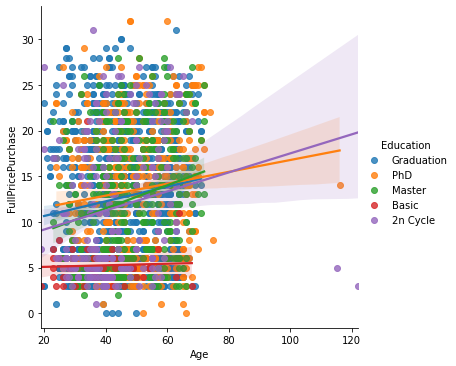

In [187]:
plt.figure(figsize=(20,11)) #increase the size of the graph
sns.lmplot(data=df, x='Age', y='FullPricePurchase', hue = 'Education') #visualize a trend line regarding education and number of full priced purchases

In [83]:
cust_status = pd.get_dummies(df['Marital_Status']) #Convert categorical variable into indicator variables for Marital Status

In [84]:
education_encoded = pd.get_dummies(df['Education']) #Convert categorical variable into indicator variables for Education

In [135]:
print(cust_status)

      Absurd  Alone  Divorced  Married  Single  Together  Widow  YOLO
0          0      0         0        0       1         0      0     0
1          0      0         0        0       1         0      0     0
2          0      0         0        0       0         1      0     0
3          0      0         0        0       0         1      0     0
4          0      0         0        1       0         0      0     0
...      ...    ...       ...      ...     ...       ...    ...   ...
2235       0      0         0        1       0         0      0     0
2236       0      0         0        0       0         1      0     0
2237       0      0         1        0       0         0      0     0
2238       0      0         0        0       0         1      0     0
2239       0      0         0        1       0         0      0     0

[2240 rows x 8 columns]


In [171]:
fine_data = pd.concat([cust_status, education_encoded], axis=1)

<Figure size 1080x576 with 0 Axes>

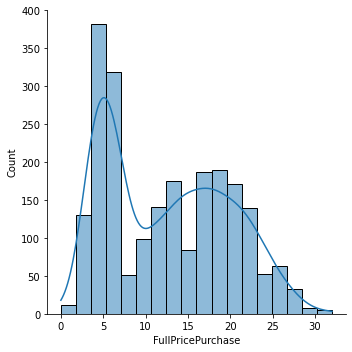

In [185]:
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.displot(data=df, x="FullPricePurchase", kde = True) #create a distribution plot of the new full price purchase column

I droped columns that are no longer needed because they have been aggregated or not useful in my analysis, including ID, year of birth, revenue, cost of contact, AcceptedCmp1 - 5, Response (indicates the customer accepted offer on last campaign), kid, teen.

Though looking at the number of times a customer was offered a deal before they accepted is interesting, we are concentrating on total number of deals and full priced purchases. 

In [87]:
df.drop(columns=['ID', 'Kidhome', 'Teenhome', 'Year_Birth','Z_CostContact','Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True) 
#drop columns from the data frame

In [131]:
print(df)

       Education Marital_Status   Income Dt_Customer  Recency  MntWines  \
0     Graduation         Single  58138.0  2012-04-09       58       635   
1     Graduation         Single  46344.0  2014-08-03       38        11   
2     Graduation       Together  71613.0  2013-08-21       26       426   
3     Graduation       Together  26646.0  2014-10-02       26        11   
4            PhD        Married  58293.0  2014-01-19       94       173   
...          ...            ...      ...         ...      ...       ...   
2235  Graduation        Married  61223.0  2013-06-13       46       709   
2236         PhD       Together  64014.0  2014-10-06       56       406   
2237  Graduation       Divorced  56981.0  2014-01-25       91       908   
2238      Master       Together  69245.0  2014-01-24        8       428   
2239         PhD        Married  52869.0  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88             

## Answering the data question

After analyzing the data the data question did change. I saw that the number of discount purchases recorded wasn't large enough to lend itself to a interesting or accurate analysis and instead pivoted to look at the customer behaviours or characteristics that are most closely related to the full priced purchases, and from that aimed to make recomendations to marketing and partnerships. 

I used regression modeling to look at the correlations along with visualizations to illustate the findings. 

In [89]:
regression_data = df[['Income', 'Recency', 'MntWines', 'MntFishProducts', 'MntFruits', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Dependents', 'Age', 'FullPricePurchase']] #created a regression list
regression_data[['MntWines', 'MntFishProducts', 'MntFruits', 'NumDealsPurchases','FullPricePurchase']].corr() #display the correlations between the values

,MntWines,MntFishProducts,MntFruits,NumDealsPurchases,FullPricePurchase
MntWines,1.000000,0.399753,0.389637,0.010940,0.756490
MntFishProducts,0.399753,1.000000,0.594804,-0.139361,0.537538
MntFruits,0.389637,0.594804,1.000000,-0.132114,0.520686
NumDealsPurchases,0.010940,-0.139361,-0.132114,1.000000,0.117887
FullPricePurchase,0.756490,0.537538,0.520686,0.117887,1.000000


In [90]:
regression_data = regression_data.dropna() #drop any nulls

In [91]:
regression_data.shape #display the shape the data with dropped collulmns 

(2216, 10)

In [95]:
dependent_vars = regression_data['FullPricePurchase'] #establish the dependent variables
independent_vars = regression_data[['Income', 'Recency', 'MntWines', 'MntFishProducts', 'MntFruits', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Dependents', 'Age']] #establish independent variables 
independent_vars['constant'] = np.ones((independent_vars.shape[0],)) #add a constant column for the regression

#make sure all our data is numeric
dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)

#create linear regression class, with our data
lin_reg = sm.OLS(dependent_vars, independent_vars) # initializing sqs 
reg_results = lin_reg.fit() #fit the model to the data using the fit method
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:      FullPricePurchase   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     651.4
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:09:50   Log-Likelihood:                -6083.0
No. Observations:                2216   AIC:                         1.219e+04
Df Residuals:                    2206   BIC:                         1.224e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Income             4.463e-05   4.53e-0

The 2 note indicates that two of the columns are so closely correlated that it could cause a numerical problem. Looking at the correlation in regression data from the analysis above, the number of fish products and fruit products are very closely correlated, I removed fish products from the regression model along with Recency. 

Through trial and error I discoved that dropping other variables from the model only reduced the R-squared value. Though not an excellent model, this is still a reasonable R-squared value. 

In [191]:
indep2 = independent_vars.drop(columns=['Recency']) #dropping the Recency column to improve the model

lin_reg2 = sm.OLS(dependent_vars, indep2)
regression2 = lin_reg2.fit() 

print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:      FullPricePurchase   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     733.1
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        08:39:19   Log-Likelihood:                -6083.0
No. Observations:                2216   AIC:                         1.218e+04
Df Residuals:                    2207   BIC:                         1.224e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Income             4.463e-05   4.53e-0

### Visualizations

Below are visuals to illustrate the regression findings.

First, the relation between full priced purchases and the amount of fruit purchased. 

<AxesSubplot:xlabel='MntFruits', ylabel='FullPricePurchase'>

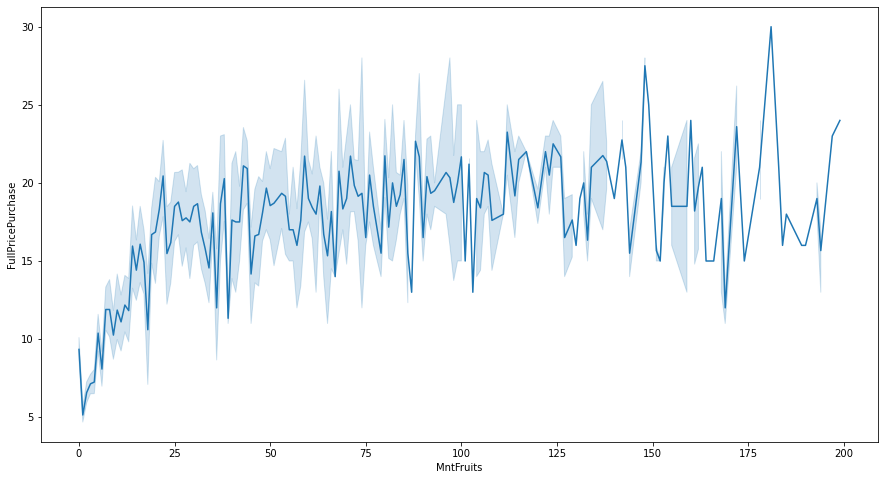

In [121]:
##display the number of web purchase
splt.figure(figsize=(15,8)) #increase the size of the graph
#plot the amount of fruit puchased and full priced purchases from the business
sns.lineplot(x="MntFruits", y="FullPricePurchase", 
             data=df)

Next, the relation between full priced purchases and the number of deals purchased. 
We can see that based on the regression model and through this visualization they are related. 

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='FullPricePurchase'>

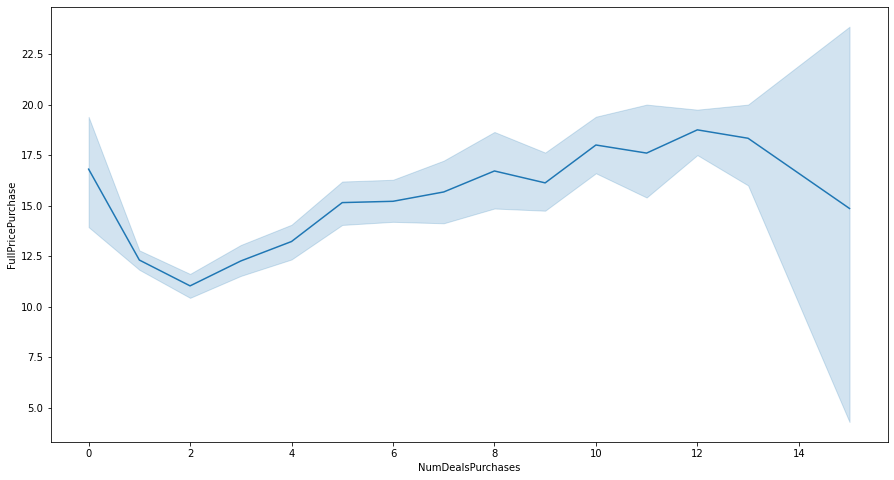

In [134]:
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.lineplot(x="NumDealsPurchases", y="FullPricePurchase", #look at the full price purchases and the number of web visits per month
           
             data=df)

Now for a look at where customers make their full priced purchases and web purchases, along with the number of web visits. This is of interest to marketing to point out that the greater number of web visits does not directly relate to purchases. This may caution against a heavy digital ad buy.

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='FullPricePurchase'>

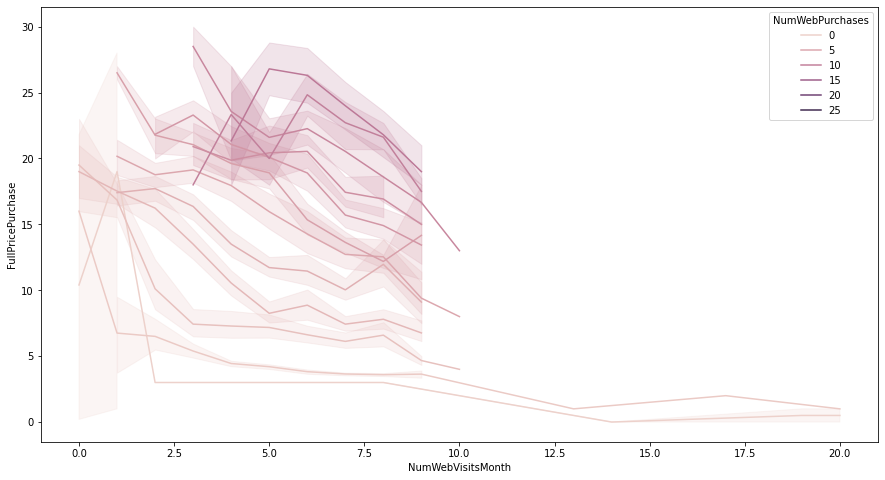

In [188]:
##display the number of web purchases 
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.lineplot(x="NumWebVisitsMonth", y="FullPricePurchase", #look at the full price purchases and the number of web visits per month
            hue="NumWebPurchases",
             data=df)


This dependent graph illustrates that a higher number of full price purchases are associates to customers who have no dependents and decreaces with the greater number or dependents.

<AxesSubplot:xlabel='Dependents', ylabel='FullPricePurchase'>

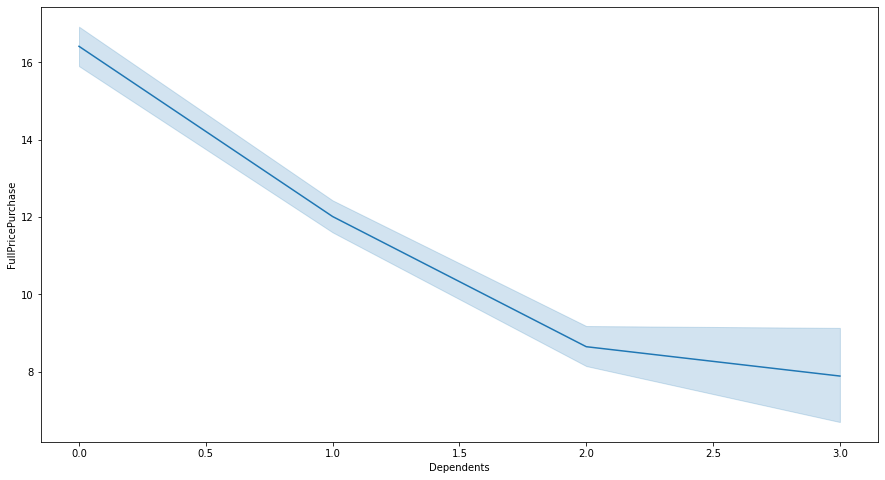

In [194]:
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.lineplot(x="Dependents", y="FullPricePurchase", #look at the full price purchases and the number of web visits per month
           
             data=df)

In contrast I have illustrated that the number of deals purchased increases along with the number of deoendents

<AxesSubplot:xlabel='Dependents', ylabel='NumDealsPurchases'>

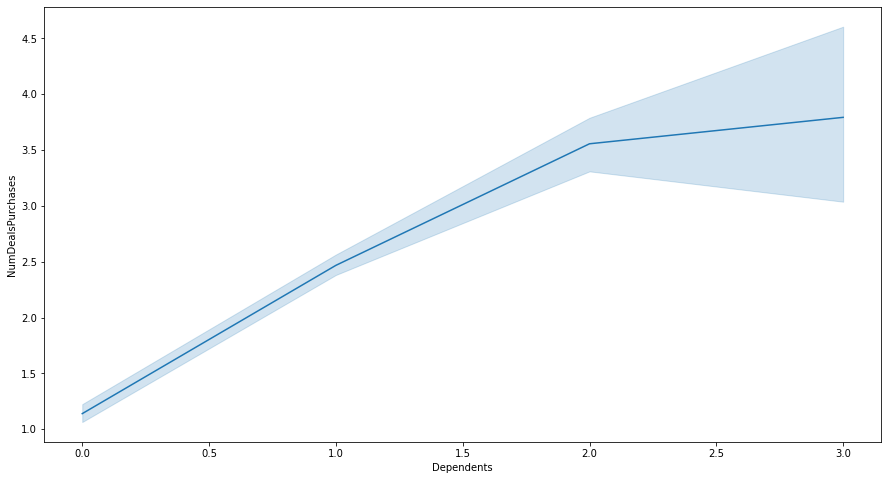

In [195]:
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.lineplot(x="Dependents", y="NumDealsPurchases", #look at the full price purchases and the number of web visits per month
           
             data=df)

This graph displays customer purchasese, both full priced and discounts based on marital status. 

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='FullPricePurchase'>

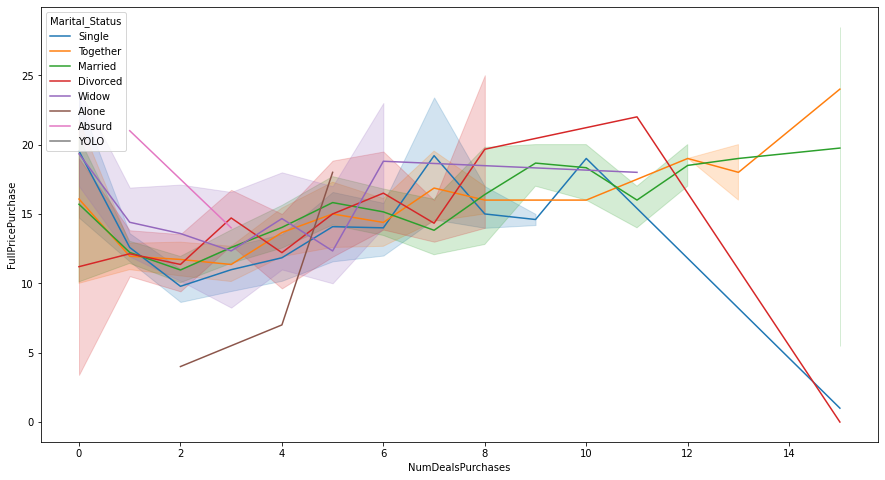

In [174]:
plt.figure(figsize=(15,8)) #increase the size of the graph
sns.lineplot(x="NumDealsPurchases", y="FullPricePurchase", #look at the full price purchases and deals, in relation to mariatal status
            hue="Marital_Status",
             data=df)

### Recommendations
Based on this analysis I would suggest that marketing efforts continue with a focus on deals as these have been successful in customer retention and those who purchase a deal are likely to purchase full priced prodcts. Therefore deal incentives are a wise strategy to continue with. 

When focusing on partnerships I would suggest a fruit focused company to align with to create a promotional campaign that connects with the biggest customer segments that purchase from the company, a income of under 100,000 , age 26 to 64, have graduated or have undertaken a 2n cycle. 

For campaigns for full priced items, targeting those with no dependents and for deal offers those with 1 or more dependents. Similarly, the customer segments can look a bit different regarding full and discount items and marital status. Cystomers who are married or together are fairly consistent in making both full priced and discounted puchases, and those alone or divorced purchase a large number of deals but this does not translate to full priced purchases. 